<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/20%20-%20Sklearn%20(les%20Bases).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20/30 Apprentissage Supervisé avec Sklearn

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##1. Régression

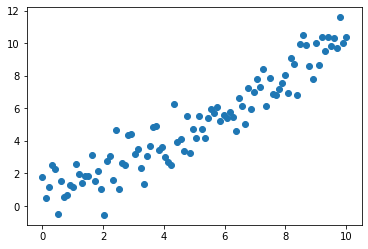

In [11]:
np.random.seed(0)
m = 100 # creation de 100 échantillons
X = np.linspace(0, 10, m).reshape(m,1)
y = X + np.random.randn(m, 1)

plt.scatter(X, y)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()
model.fit(X, y) # entrainement du modele
model.score(X, y) # évaluation avec le coefficient de corrélation

0.8881140743377214

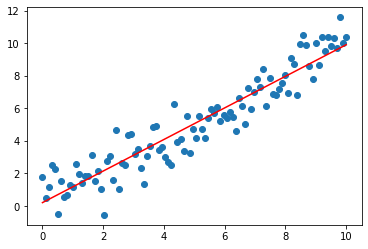

In [14]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), c='red')

##2. Classification

In [15]:
titanic = sns.load_dataset('titanic')
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
model = KNeighborsClassifier(n_neighbors=4)

In [18]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [19]:
model.fit(X, y) # entrainement du modele
model.score(X, y) # évaluation

0.834733893557423

In [20]:
result = {}
for i in range(1, 100):
    model = KNeighborsClassifier(n_neighbors=i)

    y = titanic['survived']
    X = titanic.drop('survived', axis=1)

    model.fit(X, y) # entrainement du modele
    result[model.score(X, y)] = i

print(result)

tmp = 0
for i in result:
    if tmp > float(i):
        continue
    tmp = i 


print(tmp)


{0.8235294117647058: 1, 0.8221288515406162: 2, 0.8291316526610645: 3, 0.834733893557423: 4, 0.8305322128851541: 5, 0.8165266106442577: 7, 0.8081232492997199: 10, 0.8179271708683473: 9, 0.8067226890756303: 11, 0.7871148459383753: 21, 0.7997198879551821: 13, 0.7941176470588235: 14, 0.7955182072829131: 15, 0.7857142857142857: 18, 0.7913165266106442: 17, 0.788515406162465: 19, 0.7829131652661064: 20, 0.7647058823529411: 22, 0.7661064425770309: 23, 0.7591036414565826: 29, 0.7605042016806722: 25, 0.7521008403361344: 26, 0.7450980392156863: 30, 0.7549019607843137: 31, 0.742296918767507: 37, 0.7478991596638656: 33, 0.7310924369747899: 34, 0.7254901960784313: 35, 0.7324929971988795: 36, 0.7226890756302521: 41, 0.7282913165266106: 39, 0.7030812324929971: 42, 0.7128851540616247: 43, 0.6778711484593838: 44, 0.6848739495798319: 45, 0.6722689075630253: 46, 0.6680672268907563: 47, 0.6694677871148459: 51, 0.6708683473389355: 49, 0.6666666666666666: 50, 0.6624649859943977: 52, 0.6610644257703081: 55, 0

##3. Prediction de survie

In [42]:
def survie(model, pclass=1, sex=0, age=21):
  x = np.array([pclass, sex, age]).reshape(1, 3)
  print(model.predict(x))
  print(model.predict_proba(x))

In [43]:
survie(model)

[0]
[[0.6969697 0.3030303]]


/home/seb/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/seb/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## 4. Exercice et Solution
Écrire un code qui permet de trouver la meilleure valeur de voisin n_neighbors pour le modele de KNeighborsClassifier.

Dans sklearn, il est possible de faire cela avec la classe GridSearchCV. Mais il peut également etre utile de savoir écrire soi-meme ce genre de code de recherche.

4


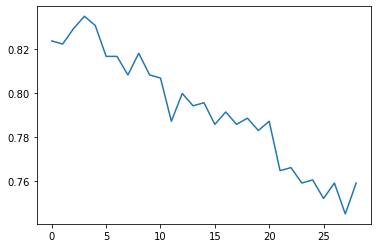

In [44]:
# SOLUTION
score = []
best_k = 1
best_score = 0

for k in range(best_k, 30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    score.append(model.score(X, y))
    
    if best_score < model.score(X, y):
        best_k = k
        best_score = model.score(X, y)

print(best_k)
plt.plot(score)